### DEMO-8

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Torch has interesting data types. Everything in torch is a tensor.

In [3]:
a = np.random.rand(2,3)
print(a)

[[0.72661722 0.99847121 0.79717675]
 [0.81983416 0.48670823 0.00724188]]


#### If i want to manipulate it in torch, I need to convert it into a torch tensor

In [4]:
b = torch.from_numpy(a)
print(b)

tensor([[0.7266, 0.9985, 0.7972],
        [0.8198, 0.4867, 0.0072]], dtype=torch.float64)


Tensor is a multidimensional matrix. Tensors give us a nice API for storing intermediate computation variables.

In [5]:
A = torch.rand(2,2) #generate a random number
x = torch.rand(2,1,requires_grad = True)  #if we want to look at gradients, if we have variables and we want at their derivatives, we do requires_grad

y = torch.matmul(A,x) # y = ax
print(y)

tensor([[1.2834],
        [1.2774]], grad_fn=<MmBackward>)


In [6]:
x = y.sum()
print(x)

tensor(2.5608, grad_fn=<SumBackward0>)


In [8]:
z = y.sum()
print(z)
z.backward() #dz/dx: gives us the gradient
print(z)

tensor(2.5608, grad_fn=<SumBackward0>)
tensor(2.5608, grad_fn=<SumBackward0>)


Let's use torch to train a simple neural net that implements logistic regression

In [9]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST',train=True, download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST',train=False,download = True,transform=torchvision.transforms.ToTensor())

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw
Processing...
Done!





In [10]:
print(len(trainingdata),len(testdata))

60000 10000


In [15]:
image,label = trainingdata[0]
print(image.shape,label)

torch.Size([1, 28, 28]) 9


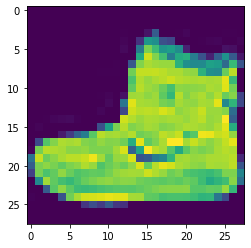

In [17]:
plt.imshow(image.squeeze().numpy()) #removes unnecessary dimensions, in this case it is 1 from [1,28,28]
plt.show()

In [20]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size = 64, shuffle=True) #shuffling the training data like sgd
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size = 64, shuffle=False)

In [23]:
images, labels = iter(trainDataLoader).next() #iterates through training data and switches to next batch of data
print(images.size(), labels)

torch.Size([64, 1, 28, 28]) tensor([9, 5, 7, 6, 8, 8, 8, 4, 0, 4, 3, 8, 0, 9, 2, 6, 9, 0, 9, 1, 5, 3, 0, 6,
        7, 6, 4, 5, 3, 3, 3, 3, 3, 5, 3, 7, 3, 2, 3, 7, 2, 9, 2, 3, 6, 0, 5, 0,
        7, 3, 2, 9, 0, 0, 3, 0, 4, 1, 2, 5, 4, 3, 7, 7])


Taken the data in the traindataloader, steps through data, batch of 64 of 1,28,28 images and everything in tensor([3,4,...]) are their labels. If you rerun this cell, the labels would change: that is the next batch of labels

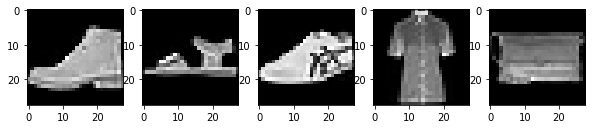

In [25]:
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
    plt.subplot(1,5,index+1)
    plt.imshow(images[index].squeeze().numpy(), cmap = plt.cm.gray)

In [29]:
# class LinearReg(torch.nn.Module):
#     def _init_(self):
#         super(LinearReg,self)._init_()
#         self.linear = torch.nn.Linear(28,28,10)
        
#     def forward(self,x):
#         x = x.view(-1,28*28)
#         transformed_x = self.linear(x)
#         return transformed_x
    
# net = LinearReg().cuda()
# Loss = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(net.parameters(), lr=0.01)



class LinearReg(torch.nn.Module):
    def __init__(self):
        super(LinearReg, self).__init__()
        self.linear = torch.nn.Linear(28*28,10)

    def forward(self, x):
        x = x.view(-1,28*28)
        transformed_x = self.linear(x)
        return transformed_x

net = LinearReg().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle
# Classification Methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
import pandas as pd
import time
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
import numpy as np
# Print 10 images of each class
unique_labels = np.unique(train_labels)
plt.figure(figsize = (20,20))
for label in unique_labels:
count = 0
for i in range(6000):
if train_labels[i] == label:
factor = 10 * label
plt.subplot(10, 10, count + factor + 1)
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[i], cmap = plt.cm.binary)
plt.xlabel(train_labels[i])
count += 1
if count == 10:
break
plt.show()